# Integration

<div class="alert alert-block alert-info">
    <img style="float: right;" src="https://raw.githubusercontent.com/OpenSourceEconomics/ose-corporate-design/master/logos/OSE_logo_RGB.svg" width="150">
    <u><h1>Setup</h1></u>
</div>

Consider finding the area under a continuous real-valued function $f$ over a bounded interval $[a, b]$:

\begin{align*}
A = \int_a^b f(x) dx
\end{align*}

Let's look a visual representation of our problem.

<img src="material/fig-area-curve.png" width=500 height=500 />

Most numerical methods for computing this integral split up the original integral into a sum of several integrals, each covering a smaller part of the original integration interval $[a, b]$. This re-writing of the integral is based on a selection of integration points $x_i , i = 0, 1, . . . , n$ that are distributed on the interval $[a, b]$. Integration points may, or may not, be evenly distributed.

Given the integration points, the original integral is re-written as a sum of integrals, each integral being computed over the sub-interval between two consecutive integration points. The integral from the beginning is thus expressed as:

\begin{align*}
\int_a^b f(x) dx = \int_{x_0}^{x_1} f(x) dx + \int_{x_1}^{x_2} f(x) dx  +  ... + \int_{x_{n-1}}^{x_n} f(x) dx , 
\end{align*}
where $x_0 = a$ and $x_n = b$.

The different integration methods will differ in the way they approximate each integral on the right hand side. The fundamental idea is that each term is an integral over a small interval $[x_i , x_{i+1}]$, and over this small interval, it makes sense to approximate $f$ by a simple shape

In [1]:
from integration_algorithms import quadrature_newton_trapezoid_one
from integration_algorithms import quadrature_newton_simpson_one
from integration_algorithms import quadrature_gauss_legendre_one
from integration_algorithms import quadrature_gauss_legendre_two
from integration_algorithms import monte_carlo_naive_one

from integration_plots import plot_naive_monte_carlo_randomness
from integration_plots import plot_naive_monte_carlo_error
from integration_plots import plot_gauss_legendre_weights
from integration_plots import plot_benchmarking_exercise
from integration_plots import plot_naive_monte_carlo
from integration_plots import plot_quasi_monte_carlo

from integration_problems import problem_kinked
from integration_problems import problem_smooth

<div class="alert alert-block alert-info">
    <u><h2>Newton-Cotes rules</h2></u>
</div>


Newton–Cotes quadrature rules are a group of formulas for numerical integration (also called quadrature) based on evaluating the integrand at equally spaced points. The integration points are then computed as

\begin{align*}
x i = a + ih, i = 0, 1, . . . , n,
\end{align*}

where $h = (b - a) / n$

The closed Newton-Cotes formula of degree $n$ is stated as

\begin{align*}
\int_a^b f(x) dx \approx \sum^n_{i=0} \omega_i f(x_i)
\end{align*}


We will consider the first two degrees in more detail:

* Trapezoid rule

* Simpson’s rule

## Trapezoid rule


The Trapezoid rule approximates the area under the function $f$ with the area under a piecewise linear approximation to $f$.  

<img src="material/fig-trapezoid-two-points.png" width=500 height=500 />
<img src="material/fig-trapezoid-four-points.png" width=500 height=500 />
<img src="material/fig-trapezoid-eight-points.png" width=500 height=500 />

More formally:

\begin{align*}
\int_a^b f(x) dx & = \int_{x_0}^{x_1} f(x) dx + \int_{x_1}^{x_2} f(x) dx  +  ... + \int_{x_{n-1}}^{x_n} f(x) dx \\
                 &\approx h \frac{f(x_0) - f(x_1)}{2} + \frac{f(x_1) - f(x_2)}{2} + ... + \frac{f(x_{n-1}) - f(x_n)}{2}, 
\end{align*}

which we can further simplify to:

\begin{align*}
\int_a^b f(x) dx \approx 0.5h f(x_0) + h\sum_{i = 1}^{n -1}f(x_i) + 0.5 h f(x_n)
\end{align*}


The weights are then the following:

\begin{align*}
\omega_i = \begin{cases}
h / 2 & \text{if $i \in \{0, n\}$}   \\
h & \text{otherwise}
\end{cases}
\end{align*}

In [2]:
??quadrature_newton_trapezoid

Object `quadrature_trapezoid` not found.


## Simpson’s rule


Simpson’s rule approximates the area under a function $f$ with the area under a piecewise quadratic approximation to $f$.

<img src="material/fig-simpson-two-points.png" width=500 height=500 />
<img src="material/fig-simpson-four-points.png" width=500 height=500 />
<img src="material/fig-simpson-eight-points.png" width=500 height=500 />


The weights are the following:

\begin{align*}
w_i  = \begin{cases}
h / 3 & \text{for $i \in [0, n]$} \\
4 h / 3& \text{for $0 < i < n, i$ even} \\
2 h / 3& \text{for $0 < i < n, i$ odd} \\
\end{cases}
\end{align*}

In [3]:
??quadrature_newton_simpson_one

Signature: quadrature_simpson_one(f, a, b, n)
Docstring: <no docstring>
Source:   
def quadrature_simpson_one(f, a, b, n):

    if n % 2 == 0:
        raise Warning("n must be an odd integer. Increasing by 1")
        n += 1

    xvals = np.linspace(a, b, n)
    fvals = np.tile(np.nan, n)

    h = xvals[1] - xvals[0]

    weights = np.tile(np.nan, n)
    weights[0::2] = 2 * h / 3
    weights[1::2] = 4 * h / 3
    weights[0] = weights[-1] = h / 3

    for i, xval in enumerate(xvals):
        fvals[i] = f(xval)

    return np.sum(weights * fvals)
File:      ~/external-storage/ownCloud/office/OpenSourceEconomics/teaching/scientific-computing/course/lectures/integration/integration_algorithms.py
Type:      function


<div class="alert alert-block alert-info">
    <u><h2>Gaussian formulas</h2></u>
</div>

Gaussian quadrature formulas employ a very different logic to compute the area under a curve $f$ over a bounded interval $[a, b]$. Specifically, the $n$ quadrature nodes $x_i$ and $n$ quadrature weights $\omega_i$ are chosen to exactly integrate polynomials of degree $2n - 1$ or less.

Gaussian quadrature approximations of the form:

\begin{align*}
\int_a^b f(x) w(x) dx \approx \sum_{i = 1}^{n}\omega _i f(x_i)
\end{align*}

for any nonnegative weighing function $w(x)$. Gauss-Legendre uses the weighing function $w(x) = 1$. Other versions of $w(x)$ lead to include Gauss-Chebyshev, Gauss-Hermite and Gauss-Laguerre.



We start from the special domain between $[-1, 1]$, again the formula for our approximate solution looks very similar.

\begin{align*}
\int_{-1}^1 f(x) dx\approx \sum^n_{i=1} w_i f(x_i)
\end{align*}


So, more generally using a change of variables:

\begin{align*}
\int_a^b f(x) = \approx \frac{b -a }{2} \sum^n_{i=1} w_i f\left(\frac{(x_i + 1)(b - a)}{2} + a\right)
\end{align*}


Unlike in the case of the Newton-Cotes approach, Gaussian  nodes are not uniformly spaced and do not include the integration limits.

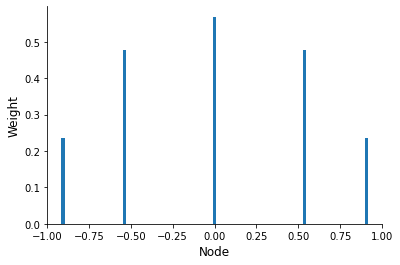

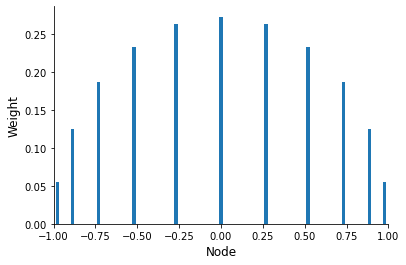

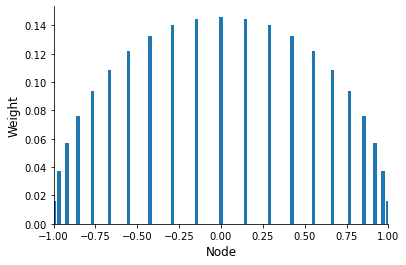

[None, None, None]

In [4]:
[plot_gauss_legendre_weights(deg) for deg in [5, 11, 21]]

<div class="alert alert-success">
    <h3>Questions</h3>  
     <ul>
  <li>What are the properties of the weights?</li>
    </ul> 
</div>

In [5]:
??quadrature_gauss_legendre_one

Signature: quadrature_gauss_legendre_one(f, a, b, n)
Docstring: <no docstring>
Source:   
def quadrature_gauss_legendre_one(f, a, b, n):
    xvals, weights = np.polynomial.legendre.leggauss(n)
    xval_trans = (b - a) * (xvals + 1.0) / 2.0 + a

    fvals = np.tile(np.nan, n)
    for i, xval in enumerate(xval_trans):
        fvals[i] = ((b - a) / 2.0) * f(xval)

    return np.sum(weights * fvals)
File:      ~/external-storage/ownCloud/office/OpenSourceEconomics/teaching/scientific-computing/course/lectures/integration/integration_algorithms.py
Type:      function


### Benchmarking

<div class="alert alert-warning">
    <h3>Exercises</h3>  
     <ul>
      <li> Compare the performance our integration routines on the following two integrals.</li>
    </ul> 
</div>

We study the following two cases:


\begin{align*}
f(x) & = \int_{-1}^1 e^{-x} dx \\
f(x) & = \int_{-1}^1 \sqrt{|x|} dx
\end{align*}


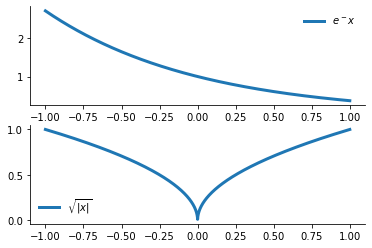

In [6]:
plot_benchmarking_exercise()

How can we extend the ideas so far to multidimensional integration? 


\begin{align*}
\int_{x}\int_{y} f(x, y) dx dy
\end{align*}


The product rule approximates the integral with the following sum:

\begin{align*}
\sum_{i_x = 1}^m \sum_{i_y = 1}^m \omega_{i_x} \omega_{i_y} f(x_{1} y_{1}) 
\end{align*}

A difficulty of this approach is the curse of dimensionality as the number of nodes inreases exponentially with the number of dimensions.


In [7]:
??quadrature_gauss_legendre_two

Signature: quadrature_gauss_legendre_two(f, a=-1, b=1, n=10)
Docstring: <no docstring>
Source:   
def quadrature_gauss_legendre_two(f, a=-1, b=1, n=10):

    n_dim = int(np.sqrt(n))

    xvals, weight_uni = np.polynomial.legendre.leggauss(n_dim)
    xvals_transformed = (b - a) * (xvals + 1.0) / 2.0 + a

    weights = np.tile(np.nan, n_dim ** 2)
    fvals = np.tile(np.nan, n_dim ** 2)

    counter = 0
    for i, x in enumerate(xvals_transformed):
        for j, y in enumerate(xvals_transformed):
            weights[counter] = weight_uni[i] * weight_uni[j]
            fvals[counter] = f([x, y])
            counter += 1

    return ((b - a) / 2) ** 2 * np.sum(weights * np.array(fvals))
File:      ~/external-storage/ownCloud/office/OpenSourceEconomics/teaching/scientific-computing/course/lectures/integration/integration_algorithms.py
Type:      function


<div class="alert alert-block alert-info">
    <u><h2>Monte Carlo integration</h2></u>
</div>

Naive Monte Carlo integration uses random sampling of a function to numerically compute an estimate of its integral. We can approximate this integral by averaging $N$ samples of the function $f$ drawn from a uniform distribution between $a$ and $b$.

\begin{align*}
\int_a^b f(x) dx \approx (b - a) \frac{1}{N} \sum_{i = 1}^N f(x_i)
\end{align*}

Why?


\begin{align*}
E\left[ (b - a)  \frac{1}{N} \sum_{i = 1}^N f(x_i)\right] & = (b - a)  \frac{1}{N}  \sum_{i = 1}^N E\left[f(x_i)\right] \\
                                                 & =  (b - a)  \frac{1}{N}  \sum_{i = 1}^N\left[\int_a^b f(x) \frac{1}{b - a} dx\right] \\
                                                 & =  \frac{1}{N}  \sum_{i = 1}^N \int_a^b f(x) dx  \\
                                                 & = \int_a^b f(x) dx  
\end{align*}









In [13]:
??monte_carlo_naive_one

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


Signature: monte_carlo_naive_one(f, a=0, b=1, n=10, seed=123)
Docstring: <no docstring>
Source:   
def monte_carlo_naive_one(f, a=0, b=1, n=10, seed=123):
    np.random.seed(seed)
    xvals = np.random.uniform(size=n)
    fvals = np.tile(np.nan, n)
    weights = np.tile(1 / n, n)

    scale = b - a
    for i, xval in enumerate(xvals):
        fvals[i] = f(a + xval * (b - a))

    return scale * np.sum(weights * fvals)
File:      ~/external-storage/ownCloud/office/OpenSourceEconomics/teaching/scientific-computing/course/lectures/integration/integration_algorithms.py
Type:      function


Monte Carlo integration only converges very slowly. Let's consider our smooth benchmarking example from earlier.

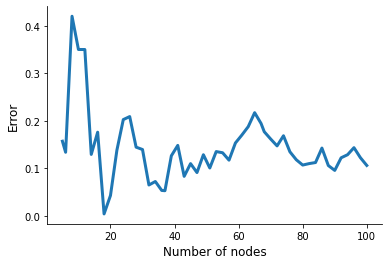

In [19]:
plot_naive_monte_carlo_error(max_nodes=100)

Naive Monte Carlo integration differs from our earlier methods as the approximation itself is a random variable. How about the level of randomness at a given number $(n = 50)$ of integration nodes? 

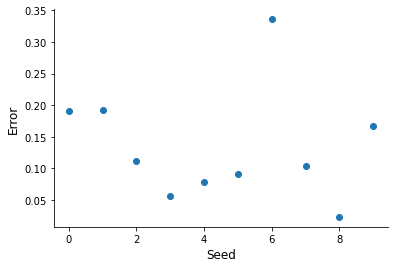

In [16]:
plot_naive_monte_carlo_randomness()

However, Monte Carlo integration is particular useful when tackling multidimensional integrals. Let's consider the computation of a two dimensional integral going forward.

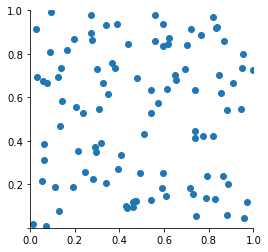

In [34]:
plot_naive_monte_carlo(100)

Quasi-Monte Carlo employ deterministic sequences of nodes $x_i$ with the property that

\begin{align*}
\lim_{n \rightarrow \infty} \frac{b - a}{n} \sum_{i=1}^n f(x_i)= \int_{a}^b f(x) dx
\end{align*}



Deterministic sequences of nodes chosen to fill space in a regular manner typically provide more accurate
integration approximations than pseudo-random sequences.

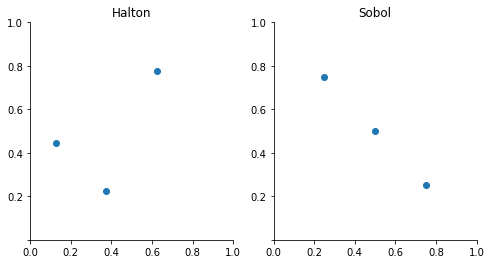

In [36]:
plot_quasi_monte_carlo(3)

Let's consider the following test function from Genz (1984).


<img src="material/fig-discontinuous-integrand.png" width=500 height=500 />



<div class="alert alert-warning">
    <h3>Exercises</h3>  
     <ul> 
      <li> What are the properties of the function?</li>
         <li> Compare the performance naive and quasi Monte Carlo integration routines for $u = (0.5, 0.5)$ and $a = (5. 5)$ over the two-dimensional unit cube.</li>
         <li> How does Gauss-Legendre quadrature perform?</li>
    </ul> 
</div>

#### Research

* https://papers.ssrn.com/sol3/papers.cfm?abstract_id=1870703

* https://www.sciencedirect.com/science/article/abs/pii/S0304407607002552

* https://arxiv.org/abs/1908.04110

* Philip J. Davis and Philip Rabinowitz, Methods of Numerical Integration.

* https://www.sciencedirect.com/science/article/pii/S0021999185712090

* https://ins.uni-bonn.de/media/public/publication-media/sparse_grids_nutshell.pdf?pk=639

### Resources

* http://hplgit.github.io/prog4comp/doc/pub/p4c-sphinx-Python/._pylight004.html

* http://people.duke.edu/~ccc14/cspy/15C_MonteCarloIntegration.html

* https://www.math.ubc.ca/~pwalls/math-python/integration/integrals/

* https://guido.vonrudorff.de/wp-content/uploads/2020/05/NumericalIntegration.pdf

* https://readthedocs.org/projects/mec-cs101-integrals/downloads/pdf/latest/

### References

* Genz, A. (1984, September). Testing multidimensional integration routines. In Proc. of international conference on Tools, methods and languages for scientific and engineering computation (pp. 81-94). Elsevier North-Holland, Inc..